In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ComparasiónMetodos.tsv',sep=' ')
print(df)

                                                  File  Alpha   ROC-AUC  \
0    chembl23_GS3_v2.mphase_gt_0.txt.co.CM_Annotati...    0.0  0.883466   
1    chembl23_GS3_v2.mphase_gt_0.txt.co.CM_Annotati...    0.1  0.897560   
2    chembl23_GS3_v2.mphase_gt_0.txt.co.CM_Annotati...    0.2  0.900167   
3    chembl23_GS3_v2.mphase_gt_0.txt.co.CM_Annotati...    0.3  0.887830   
4    chembl23_GS3_v2.mphase_gt_0.txt.co.CM_Annotati...    0.4  0.859917   
..                                                 ...    ...       ...   
325  chembl23_GS3_v2.mphase_gt_0.txt.co.CM_Layered....    0.6  0.877397   
326  chembl23_GS3_v2.mphase_gt_0.txt.co.CM_Layered....    0.7  0.874710   
327  chembl23_GS3_v2.mphase_gt_0.txt.co.CM_Layered....    0.8  0.874063   
328  chembl23_GS3_v2.mphase_gt_0.txt.co.CM_Layered....    0.9  0.874063   
329  chembl23_GS3_v2.mphase_gt_0.txt.co.CM_Layered....    1.0  0.695819   

     AVG-Precision  
0         0.172883  
1         0.185599  
2         0.198837  
3         0.208

In [3]:
def ExtractCM(row):
    return row.split('.')[4].replace('CM_','')

def ExtractRes(row):
    if row.split('.')[5].replace('R_','') == '1':
        return 1.0
    else:
        return float('0.'+row.split('.')[6])


df['CM'] = df['File'].apply(ExtractCM)
df['Resolución'] = df['File'].apply(ExtractRes)
df = df.drop(columns = 'File')

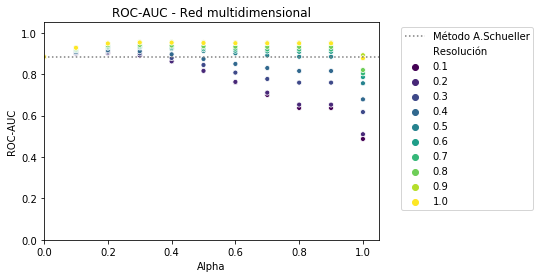

In [40]:
sns.scatterplot(x = 'Alpha', y = 'AVG-Precision', hue = 'Resolución', data = df[df['CM']=='Annotation'], legend='full', marker='.', s=100, palette='viridis')
plt.axhline(y=0.17288286528111516, label='Método A.Schueller', linestyle=':', color = 'grey')
plt.xlim(0,1.05)
plt.ylim(0,0.5)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.title('AVG. Precision - Anotaciones')
plt.savefig('PR_Anotaciones.png', dpi=300, bbox_inches='tight')
#plt.show()
plt.cla()
sns.scatterplot(x = 'Alpha', y = 'ROC-AUC', hue = 'Resolución', data = df[df['CM']=='Annotation'], legend='full', marker='.', s=100, palette='viridis')
plt.axhline(y=0.8834637313714536, label='Método A.Schueller', linestyle=':', color = 'grey')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.title('ROC-AUC - Anotaciones')
plt.savefig('ROC_Anotaciones.png', dpi=300, bbox_inches='tight')
#plt.show()
plt.cla()
sns.scatterplot(x = 'Alpha', y = 'AVG-Precision', hue = 'Resolución', data = df[df['CM']=='Layered'], legend='full', marker='.', s=100, palette='viridis')
plt.axhline(y=0.17288286528111516, label='Método A.Schueller', linestyle=':', color = 'grey')
plt.xlim(0,1.05)
plt.ylim(0,0.5)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.title('AVG. Precision - Por capa')
plt.savefig('PR_Capas.png', dpi=300, bbox_inches='tight')
#plt.show()
plt.cla()
sns.scatterplot(x = 'Alpha', y = 'ROC-AUC', hue = 'Resolución', data = df[df['CM']=='Layered'], legend='full', marker='.', s=100, palette='viridis')
plt.axhline(y=0.8834637313714536, label='Método A.Schueller', linestyle=':', color = 'grey')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.title('ROC-AUC - Por capa')
plt.savefig('ROC_Capas.png', dpi=300, bbox_inches='tight')
#plt.show()
plt.cla()
sns.scatterplot(x = 'Alpha', y = 'AVG-Precision', hue = 'Resolución', data = df[df['CM']=='Complete'], legend='full', marker='.', s=100, palette='viridis')
plt.axhline(y=0.17288286528111516, label='Método A.Schueller', linestyle=':', color = 'grey')
plt.xlim(0,1.05)
plt.ylim(0,0.5)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.title('AVG. Precision - Red multidimensional')
plt.savefig('PR_Completa.png', dpi=300, bbox_inches='tight')
#plt.show()
plt.cla()
sns.scatterplot(x = 'Alpha', y = 'ROC-AUC', hue = 'Resolución', data = df[df['CM']=='Complete'], legend='full', marker='.', s=100, palette='viridis')
plt.axhline(y=0.8834637313714536, label='Método A.Schueller', linestyle=':', color = 'grey')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.title('ROC-AUC - Red multidimensional')
plt.savefig('ROC_Completa.png', dpi=300, bbox_inches='tight')
#plt.show()

In [5]:
print(df.sort_values(by='ROC-AUC'))
print(df.sort_values(by='AVG-Precision'))

     Alpha   ROC-AUC  AVG-Precision          CM  Resolución
10     1.0  0.485750       0.061053  Annotation         0.1
120    1.0  0.487015       0.068315    Complete         0.1
21     1.0  0.503199       0.048549  Annotation         0.2
131    1.0  0.509866       0.061348    Complete         0.2
230    1.0  0.536854       0.009423     Layered         0.1
..     ...       ...            ...         ...         ...
106    0.7  0.956929       0.254120  Annotation         1.0
105    0.6  0.957573       0.254152  Annotation         1.0
104    0.5  0.958242       0.254354  Annotation         1.0
102    0.3  0.958381       0.251222  Annotation         1.0
103    0.4  0.958848       0.254371  Annotation         1.0

[330 rows x 5 columns]
     Alpha   ROC-AUC  AVG-Precision        CM  Resolución
230    1.0  0.536854       0.009423   Layered         0.1
241    1.0  0.580293       0.010418   Layered         0.2
252    1.0  0.605002       0.011477   Layered         0.3
329    1.0  0.695819    

In [6]:
print(df[df['Alpha'] == 0.0])

     Alpha   ROC-AUC  AVG-Precision          CM  Resolución
0      0.0  0.883466       0.172883  Annotation         0.1
11     0.0  0.883466       0.172883  Annotation         0.2
22     0.0  0.883466       0.172883  Annotation         0.3
33     0.0  0.883466       0.172883  Annotation         0.4
44     0.0  0.883466       0.172883  Annotation         0.5
55     0.0  0.883466       0.172883  Annotation         0.6
66     0.0  0.883466       0.172883  Annotation         0.7
77     0.0  0.883466       0.172883  Annotation         0.8
88     0.0  0.883466       0.172883  Annotation         0.9
99     0.0  0.883466       0.172883  Annotation         1.0
110    0.0  0.883466       0.172883    Complete         0.1
121    0.0  0.883466       0.172883    Complete         0.2
132    0.0  0.883466       0.172883    Complete         0.3
143    0.0  0.883466       0.172883    Complete         0.4
154    0.0  0.883466       0.172883    Complete         0.5
165    0.0  0.883466       0.172883    C

In [7]:
AS_csv = '/home/cvigilv/Repos/lppnet/chembl23_GS3_v2.mphase_gt_0.fp2.fix.txt.co.out'
AS_df = pd.read_csv(AS_csv,sep='\t',header=None, names=['Fold','QL','HT','Tc','HL','QT','TP'])
print(AS_df[AS_df['Tc'] > -99].info())
print(AS_df.nunique())
print(AS_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076887 entries, 0 to 1105103
Data columns (total 7 columns):
Fold    1076887 non-null int64
QL      1076887 non-null object
HT      1076887 non-null object
Tc      1076887 non-null float64
HL      1076887 non-null int64
QT      1076887 non-null object
TP      1076887 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 65.7+ MB
None
Fold       10
QL       1232
HT        897
Tc      15263
HL       1230
QT       1230
TP          2
dtype: int64
               Fold            Tc            HL            TP
count  1.105104e+06  1.105104e+06  1.105104e+06  1.105104e+06
mean   4.493506e+00 -2.284694e+00  6.849806e+02  8.723161e-03
std    2.874535e+00  1.565583e+01  3.545904e+02  9.298965e-02
min    0.000000e+00 -9.900000e+01 -1.000000e+00  0.000000e+00
25%    2.000000e+00  1.702130e-01  3.960000e+02  0.000000e+00
50%    4.000000e+00  2.410260e-01  7.280000e+02  0.000000e+00
75%    7.000000e+00  3.085110e-01  1.015000e+03  0.00